#### Import libraries and load datafile

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Until fuction: line seperator
def print_ln():
    print('-'*80, '\n')
    
pd.options.display.float_format = '{:.2f}'.format

# Load csv data file
telecom_orig = pd.read_csv('telecom_churn_data_clean.csv', low_memory=False)

In [2]:
# Understand the properties of loaded dataframe
telecom = telecom_orig.copy()
print('Dataframe Shape: ', telecom.shape); print_ln();
print("Dataframe Info: \n"); telecom.info(); print_ln();
telecom.head(5)

Dataframe Shape:  (30001, 149)
-------------------------------------------------------------------------------- 

Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30001 entries, 0 to 30000
Columns: 149 entries, arpu_6 to churn
dtypes: float64(123), int64(26)
memory usage: 34.1 MB
-------------------------------------------------------------------------------- 



arpu_6  arpu_7  arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0  197.38  214.82  213.80         0.00         0.00         0.00   
1 1069.18 1349.85 3171.48        57.84        54.68        52.29   
2  378.72  492.22  137.36       413.69       351.03        35.08   
3  514.45  597.75  637.76       102.41       132.11        85.14   
4   74.35  193.90  366.97        48.96        50.66        33.58   

   offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  ...  fb_user_7  \
0          0.00          0.00          0.00           0.00  ...       1.00   
1        453.43        567.16        325.91          16.23  ...      -1.00   
2         94.66         80.63        136.48           0.00  ...       1.00   
3        757.93        896.68        983.39           0.00  ...      -1.00   
4         85.41         89.36        205.89           0.00  ...       1.00   

   fb_user_8  aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  \
0       1.00  968       30.40        0.00      101.20        3.58   
1      -1.00  802       57.74       19.38       18.74        0.00   
2       1.00  315       21.03      910.65      122.16        0.00   
3      -1.00  720        0.00        0.00        0.00        0.00   
4       1.00  604       40.45       51.86        0.00        0.00   

   total_data_rech_8  amt_data_8  churn  
0             252.00    63504.00      1  
1               0.00        0.00      1  
2             207.00    24840.00      0  
3               0.00        0.00      0  
4             540.00   237060.00      0  

[5 rows x 149 columns]

#### Creating X, y variables

In [3]:
X = telecom.drop(['churn'],axis=1)
y = telecom['churn']

#### Applying standard scale

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


scaler = preprocessing.StandardScaler().fit(X)

Xscaled = scaler.transform(X)

#### Split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, train_size=0.7,random_state=42)

In [6]:
print(X_train.shape)
print(X_test.shape)

(21000, 148)
(9001, 148)


In [7]:
print("X_train Dataframe Shape {}".format(X_train.shape))
print("X_test Dataframe Shape {}".format(X_test.shape))

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data: {}".format(y_train_imb))
print("Imbalance in Test Data: {}".format(y_test_imb))

X_train Dataframe Shape (21000, 148)
X_test Dataframe Shape (9001, 148)
Imbalance in Train Data: 0.09034267912772585
Imbalance in Test Data: 0.0844578313253012


#### Applying smote

In [8]:
from imblearn.over_sampling import SMOTE
sm = SMOTE() # Default : kind = "regular"
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)


(38520, 148)
(38520,)


In [9]:
print("X_tr Dataframe Shape {}".format(X_tr.shape))
print("y_tr Dataframe Shape {}".format(y_tr.shape))

data_imbalance = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data: {}".format(data_imbalance))

X_tr Dataframe Shape (38520, 148)
y_tr Dataframe Shape (38520,)
Imbalance in Train Data: 1.0


#### Applying PCA

In [10]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
df_train_pca = pca.fit_transform(X_tr)
print(df_train_pca.shape)

df_test_pca = pca.transform(X_test)
print(df_test_pca.shape)


(38520, 148)
(9001, 148)


### Apply logistic regression

In [12]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression(C=1e9) #Smallest value specified stronger regularization
logsk.fit(df_train_pca, y_tr)

# Predicted probabilities
y_pred = logsk.predict(df_test_pca)
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

/home/sharma/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[6850 1450]
 [ 137  564]]


In [14]:
print("LogisticRegression accuracy with PCA: ",accuracy_score(y_test,y_pred))

LogisticRegression accuracy with PCA:  0.8236862570825464


In [15]:
pca.components_

array([[ 1.06801172e-01,  1.04018850e-01,  5.95361570e-02, ...,
        -1.51842629e-02, -6.19185749e-02, -2.46092794e-02],
       [ 1.39913221e-01,  1.81848259e-01,  1.92235312e-01, ...,
         2.78169125e-02,  5.28237312e-02,  4.67610353e-02],
       [ 8.36442305e-02,  7.91324243e-02,  4.46395272e-02, ...,
         3.91955799e-03,  4.89751649e-02,  4.28572778e-02],
       ...,
       [ 0.00000000e+00,  1.12716569e-16,  7.01457267e-17, ...,
         2.07222777e-17, -4.34311238e-17, -7.79803100e-17],
       [-0.00000000e+00,  1.21615089e-16,  2.60453795e-16, ...,
        -1.82760867e-17,  2.63855035e-17,  2.94916401e-17],
       [-0.00000000e+00,  6.58227015e-17, -1.37974419e-16, ...,
        -2.08244418e-17, -2.50605078e-17,  1.31269844e-17]])

In [16]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':colnames})
pcs_df.head(10)

PC1  PC2   PC3        Feature
0 0.11 0.14  0.08         arpu_6
1 0.10 0.18  0.08         arpu_7
2 0.06 0.19  0.04         arpu_8
3 0.16 0.02  0.10    onnet_mou_6
4 0.15 0.04  0.09    onnet_mou_7
5 0.10 0.06  0.05    onnet_mou_8
6 0.16 0.07  0.02   offnet_mou_6
7 0.16 0.10  0.02   offnet_mou_7
8 0.10 0.11 -0.01   offnet_mou_8
9 0.02 0.02  0.06  roam_ic_mou_6

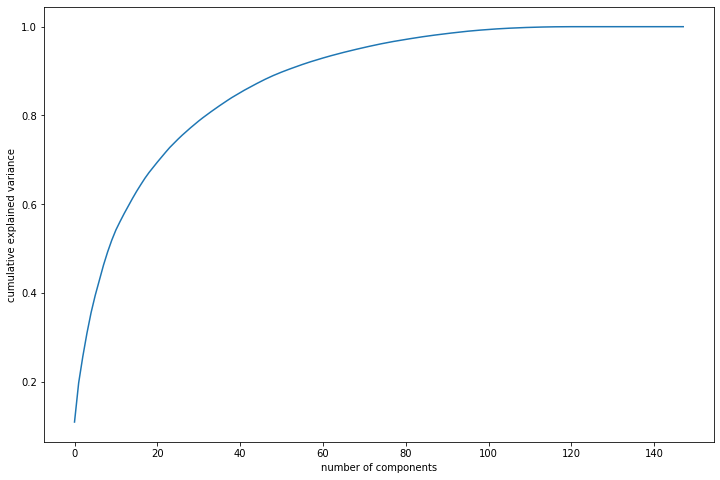

In [17]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [19]:
#### Apply logistic regression with (Assumed)48 columns (90% explained variance)

In [18]:
pca48 = PCA(n_components=48)
df_train_pca48 = pca48.fit_transform(X_tr)
print(df_train_pca48.shape)
df_test_pca48 = pca48.transform(X_test)
print(df_test_pca48.shape)

(38520, 48)
(9001, 48)


In [19]:
# Create a function for the models Logistic, DT and Random Forest
def models(X_train,y_train,randon_state_val):
    
    # Logistic Regrssion
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=randon_state_val)
    log.fit(X_train,y_train)
    
    # Decision Tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy',random_state=randon_state_val)
    tree.fit(X_train,y_train)
    
    # Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=randon_state_val)
    forest.fit(X_train,y_train)
    
    #print the model accuracy
    
    print('[0] Logistic regression training Accuracy',log.score(X_train,y_train))
    print('[1] Decision tree training Accuracy',tree.score(X_train,y_train))
    print('[2] Random Forest training Accuracy',forest.score(X_train,y_train))
    
    
    return log,tree,forest

In [20]:
# Getting Model accuracy
logreg,dtree,rforest = models(df_train_pca48, y_tr,1)

[0] Logistic regression training Accuracy 0.8421079958463136
[1] Decision tree training Accuracy 1.0
[2] Random Forest training Accuracy 0.9998182762201454


In [21]:
# Test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

def confusion_matrix_models(y_test,X_test,logreg,dtree,rforest):
    # Using LMogistic Regression   
    
    # Predicted probabilities
    #y_pred48 = logreg.predict(X_test)
    # Converting y_pred to a dataframe which is an array
    #y_pred_df = pd.DataFrame(y_pred48)
    
    cm = confusion_matrix(y_test,logreg.predict(X_test))
    print('-----------------Logistic Regression--------------------')
    print('Logistic regression  Accuracy',accuracy_score(y_test,logreg.predict(X_test)))
    print(cm)    
    print('---------------------------------------')
    
    
def test_accuracy(cm):
    TP = cm[0][0]
    TN = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]
    
    print('Testing Accuracy = ',(TP+TN)/(TP+TN+FP+FN)) ## Or Using accuracy_score



In [36]:
confusion_matrix_models(y_test,df_test_pca48,logreg,dtree,rforest)

-----------------Logistic Regression--------------------
Logistic regression  Accuracy 0.8219086768136874
[[6823 1477]
 [ 126  575]]
---------------------------------------


OBSERVATIONS

1. Data is higly imbalanced only 8.14% data is churn & remaining is non_churn
2. SMOTE is applied to balance data
    82% accuracy with default PCA
    90% variance can be explained with 48 columns and maintain 82% accuracy
3. Key features are  : -   
    arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6

In [37]:
#### using LASSO

In [22]:
print(X_tr.shape)
print(y_tr.shape)

(38520, 148)
(38520,)


In [23]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 ### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(38520, 40)
[  0   1   3   8  13  14  20  23  29  38  39  47  49  52  53  58  65  66
  78  79  80  83  91  92  95  96 100 101 107 108 113 116 126 127 128 129
 140 141 142 145]


In [24]:
#feature vector for decision tree#feature 
lasso_features = list(telecom.columns[pos])
print("Features identified by LASSO for model buidling: ", lasso_features)

Features identified by LASSO for model buidling:  ['arpu_6', 'arpu_7', 'onnet_mou_6', 'offnet_mou_8', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_6', 'spl_og_mou_8', 'og_others_7', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_8', 'max_rech_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8', 'count_rech_2g_8', 'count_rech_3g_6', 'vol_2g_mb_8', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'fb_user_8', 'aon', 'aug_vbc_3g', 'sep_vbc_3g']


In [25]:
X_train = X_lasso
y_train = y_tr

In [26]:
print ("Feature space holds %d observations and %d features" % X_train.shape)
print ("Unique target labels:", np.unique(y_train))

Feature space holds 38520 observations and 40 features
Unique target labels: [0 1]


#### Decision Tree with default hyperparameter

In [27]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
# Let's check the evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred_default = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93      8300
           1       0.35      0.78      0.48       701

    accuracy                           0.87      9001
   macro avg       0.67      0.83      0.71      9001
weighted avg       0.93      0.87      0.89      9001



In [29]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[7295 1005]
 [ 156  545]]
0.8710143317409177


<b><h4> Hyperparameter Tuning </h4></b>

<b> Getting 86% accuracy that looks to be pretty good </b>

#### Tuning max_depth

In [31]:
# # GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# # specify number of folds for k-fold CV
n_folds = 5

# # parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# # instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                                random_state = 100)

# # fit tree on training data
tree = GridSearchCV(dtree, parameters,return_train_score=True,
                     cv=n_folds, 
                    scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
 

<b> scores of GridSearch CV </b>

In [33]:
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.11          0.01             0.00            0.00   
1           0.19          0.00             0.00            0.00   
2           0.30          0.02             0.00            0.00   
3           0.37          0.01             0.00            0.00   
4           0.46          0.02             0.00            0.00   

  param_max_depth            params  split0_test_score  split1_test_score  \
0               1  {'max_depth': 1}               0.78               0.78   
1               2  {'max_depth': 2}               0.81               0.82   
2               3  {'max_depth': 3}               0.83               0.85   
3               4  {'max_depth': 4}               0.85               0.87   
4               5  {'max_depth': 5}               0.86               0.87   

   split2_test_score  split3_test_score  ...  mean_test_score  std_test_score  \
0               0.78               0.78  ...             0.78            0.00   
1               0.82               0.82  ...             0.82            0.01   
2               0.85               0.84  ...             0.84            0.01   
3               0.87               0.86  ...             0.86            0.01   
4               0.88               0.87  ...             0.87            0.01   

   rank_test_score  split0_train_score  split1_train_score  \
0               39                0.79                0.78   
1               38                0.83                0.82   
2               37                0.85                0.84   
3               36                0.87                0.87   
4               35                0.88                0.87   

   split2_train_score  split3_train_score  split4_train_score  \
0                0.78                0.78                0.78   
1                0.82                0.82                0.82   
2                0.84                0.84                0.85   
3                0.86                0.86                0.87   
4                0.87                0.87                0.87   

   mean_train_score  std_train_score  
0              0.78             0.00  
1              0.82             0.00  
2              0.84             0.00  
3              0.87             0.00  
4              0.87             0.00  

[5 rows x 21 columns]

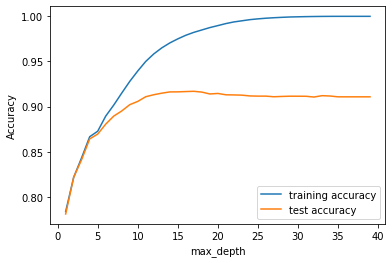

In [34]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
          scores["mean_train_score"], 
          label="training accuracy")
plt.plot(scores["param_max_depth"], 
          scores["mean_test_score"], 
          label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

conclusion for min_samples_leaf: at low values of max_depth seems overfitted. At values 18,the model becomes more stable and the training and test accuracy start to converge. max_depth=18

In [ ]:
#### Tuning min_samples_split

In [35]:
# GridSearchCV to find optimal min_samples_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters,return_train_score=True, 
                    cv=n_folds, 
                   scoring="accuracy")
tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=100,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'min_samples_split': range(5, 200, 20)},
             

In [36]:
# # scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           1.49          0.09             0.00            0.00   
1           1.45          0.04             0.00            0.00   
2           1.42          0.04             0.00            0.00   
3           1.40          0.06             0.00            0.00   
4           1.37          0.03             0.00            0.00   

  param_min_samples_split                     params  split0_test_score  \
0                       5   {'min_samples_split': 5}               0.87   
1                      25  {'min_samples_split': 25}               0.85   
2                      45  {'min_samples_split': 45}               0.85   
3                      65  {'min_samples_split': 65}               0.85   
4                      85  {'min_samples_split': 85}               0.86   

   split1_test_score  split2_test_score  split3_test_score  ...  \
0               0.91               0.93               0.92  ...   
1               0.91               0.92               0.91  ...   
2               0.91               0.91               0.91  ...   
3               0.91               0.91               0.90  ...   
4               0.90               0.91               0.90  ...   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0             0.91            0.02                1                0.99   
1             0.90            0.02                2                0.96   
2             0.90            0.02                3                0.95   
3             0.90            0.02                4                0.94   
4             0.89            0.02                5                0.94   

   split1_train_score  split2_train_score  split3_train_score  \
0                0.99                0.99                0.99   
1                0.96                0.96                0.96   
2                0.95                0.95                0.95   
3                0.94                0.94                0.94   
4                0.93                0.93                0.93   

   split4_train_score  mean_train_score  std_train_score  
0                0.99              0.99             0.00  
1                0.96              0.96             0.00  
2                0.95              0.95             0.00  
3                0.94              0.94             0.00  
4                0.93              0.93             0.00  

[5 rows x 21 columns]

In [37]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

as increase min_samples_split, the tree overfits lesser since the model is less complex

In [38]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   55.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                   

In [39]:
# # cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0            0.61          0.02             0.00            0.00   
1            0.57          0.02             0.00            0.00   
2            0.55          0.01             0.00            0.00   
3            0.55          0.00             0.00            0.00   
4            0.91          0.01             0.00            0.00   
5            0.92          0.03             0.00            0.00   
6            0.93          0.06             0.00            0.00   
7            0.93          0.02             0.00            0.00   
8            0.46          0.01             0.00            0.00   
9            0.46          0.02             0.00            0.00   
10           0.45          0.02             0.00            0.00   
11           0.52          0.02             0.00            0.00   
12           0.85          0.04             0.00            0.00   
13           0.85          0.05             0.00            0.00   
14           0.75          0.03             0.00            0.00   
15           0.79          0.04             0.00            0.00   

   param_criterion param_max_depth param_min_samples_leaf  \
0          entropy               5                     50   
1          entropy               5                     50   
2          entropy               5                    100   
3          entropy               5                    100   
4          entropy              10                     50   
5          entropy              10                     50   
6          entropy              10                    100   
7          entropy              10                    100   
8             gini               5                     50   
9             gini               5                     50   
10            gini               5                    100   
11            gini               5                    100   
12            gini              10                     50   
13            gini              10                     50   
14            gini              10                    100   
15            gini              10                    100   

   param_min_samples_split                                             params  \
0                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
1                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
2                       50  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
3                      100  {'criterion': 'entropy', 'max_depth': 5, 'min_...   
4                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
5                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
6                       50  {'criterion': 'entropy', 'max_depth': 10, 'min...   
7                      100  {'criterion': 'entropy', 'max_depth': 10, 'min...   
8                       50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
9                      100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
10                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
11                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
12                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
13                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
14                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
15                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

    split0_test_score  split1_test_score  split2_test_score  \
0                0.85               0.87               0.87   
1                0.85               0.87               0.87   
2                0.85               0.87               0.88   
3                0.85               0.87               0.88   
4                0.87               0.90               0.90   
5                0.87               0.90             

In [40]:
# # printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8920041536863966
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [41]:
# # model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                   random_state = 100,
                                   max_depth=10, 
                                   min_samples_leaf=50,
                                   min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [42]:
# # accuracy score
clf_gini.score(X_test,y_test)

0.8740139984446172

OBSERVATIONS

1. 47 features identified by LASSO for model buiding.
2. Getting around 87% accuracy
